<a href="https://colab.research.google.com/github/dspierre/data-ia/blob/dspierre-machinelearning/projet_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from tqdm import tqdm

In [2]:
!pip install  pytorch_lightning 

     |████████████████████████████████| 915 kB 11.1 MB/s 
     |████████████████████████████████| 636 kB 45.4 MB/s 
     |████████████████████████████████| 829 kB 46.5 MB/s 
     |████████████████████████████████| 118 kB 45.8 MB/s 
     |████████████████████████████████| 234 kB 46.5 MB/s 
     |████████████████████████████████| 5.6 MB 40.8 MB/s 
     |████████████████████████████████| 1.3 MB 38.4 MB/s 
     |████████████████████████████████| 142 kB 52.0 MB/s 
     |████████████████████████████████| 294 kB 49.4 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=063c991100c6ee274c70d5a0f5d318dee1962e9f2d71e1d3f1277a4022714595
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstal

In [3]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl

np.random.seed(123)

In [4]:
tag = pd.read_csv("/content/tag.csv")
movies = pd.read_csv("/content/movie.csv")
rating = pd.read_csv("/content/rating.csv")
link = pd.read_csv("/content/link.csv")
genome_tags = pd.read_csv("/content/genome_scores.csv")
genome_scores = pd.read_csv("/content/genome_scores.csv")

In [5]:
tag 

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
113165,27898,79702,quirky,2014-02-18 22:28:12
113166,27898,79702,stylized,2014-02-18 22:27:59
113167,27898,79702,surreal,2014-02-18 22:28:02
113168,27898,79702,video games,2014-02-18 22:27:55


In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [ ]:
rating

,userId,movieId,rating,timestamp
0,1,2.0,3.5,2005-04-02 23:53:47
1,1,29.0,3.5,2005-04-02 23:31:16
2,1,32.0,3.5,2005-04-02 23:33:39
3,1,47.0,3.5,2005-04-02 23:32:07
4,1,50.0,3.5,2005-04-02 23:29:40
...,...,...,...,...
1606617,10829,2335.0,4.0,2008-12-28 06:51:58
1606618,10829,2355.0,4.0,2008-12-28 05:37:05
1606619,10829,2359.0,5.0,2008-12-28 04:18:19
1606620,10829,2366.0,4.0,2008-12-28 06:39:20


In [ ]:
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


In [ ]:
genome_tags

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
...,...,...,...
3099008,3092,393,0.07675
3099009,3092,394,0.02025
3099010,3092,395,0.25225
3099011,3092,396,0.18950


In [ ]:
genome_scores

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
...,...,...,...
3099008,3092,393,0.07675
3099009,3092,394,0.02025
3099010,3092,395,0.25225
3099011,3092,396,0.18950


In [ ]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2.0,3.5,2005-04-02 23:53:47
1,1,29.0,3.5,2005-04-02 23:31:16
2,1,32.0,3.5,2005-04-02 23:33:39
3,1,47.0,3.5,2005-04-02 23:32:07
4,1,50.0,3.5,2005-04-02 23:29:40


In [ ]:
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
genome_tags.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [ ]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


##Datavisualisation  

In [ ]:
el = rating["rating"].value_counts().reset_index()
el.columns = ["rating", "percent"]
el["percent"] /= rating.shape[0]

fig = px.pie(el,
            names="rating",
            values="percent",
            title = "Rating Percent",
            width = 800,
            height=500
            )
fig.show()

## 

In [ ]:
genres = movies["genres"].values
genres = [genre.split("|") for genre in genres]
genres_list = [item for sublist in genres for item in sublist]
uniq_genres = list(set(genres_list))

In [ ]:
genres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Children', 'Drama'],
 ['Drama', '

In [ ]:
genres_list 

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Adventure',
 'Romance',
 'IMAX',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Crime'

In [ ]:
uniq_genres

['Thriller',
 'Fantasy',
 'Children',
 'Adventure',
 'Film-Noir',
 'Western',
 'Horror',
 'Romance',
 'Animation',
 'Crime',
 'Sci-Fi',
 'IMAX',
 'Mystery',
 'Documentary',
 '(no genres listed)',
 'Drama',
 'Musical',
 'War',
 'Comedy',
 'Action']

In [ ]:
genres2count = {}
for item in uniq_genres:
    genres_count = genres_list.count(item)
    genres2count[item] = genres_count

In [ ]:
df_genres2count = pd.DataFrame(genres2count.items(), columns=['genres', 'count'])

In [ ]:
df_genres2count 

,genres,count
0,Thriller,4178
1,Fantasy,1412
2,Children,1139
3,Adventure,2329
4,Film-Noir,330
5,Western,676
6,Horror,2611
7,Romance,4127
8,Animation,1027
9,Crime,2939


In [ ]:
genres_values = df_genres2count.genres.values
count_values = df_genres2count["count"].values

In [ ]:
count_values 

array([ 4178,  1412,  1139,  2329,   330,   676,  2611,  4127,  1027,
        2939,  1743,   196,  1514,  2471,   246, 13344,  1036,  1194,
        8374,  3520])

In [ ]:
genres_values

array(['Thriller', 'Fantasy', 'Children', 'Adventure', 'Film-Noir',
       'Western', 'Horror', 'Romance', 'Animation', 'Crime', 'Sci-Fi',
       'IMAX', 'Mystery', 'Documentary', '(no genres listed)', 'Drama',
       'Musical', 'War', 'Comedy', 'Action'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



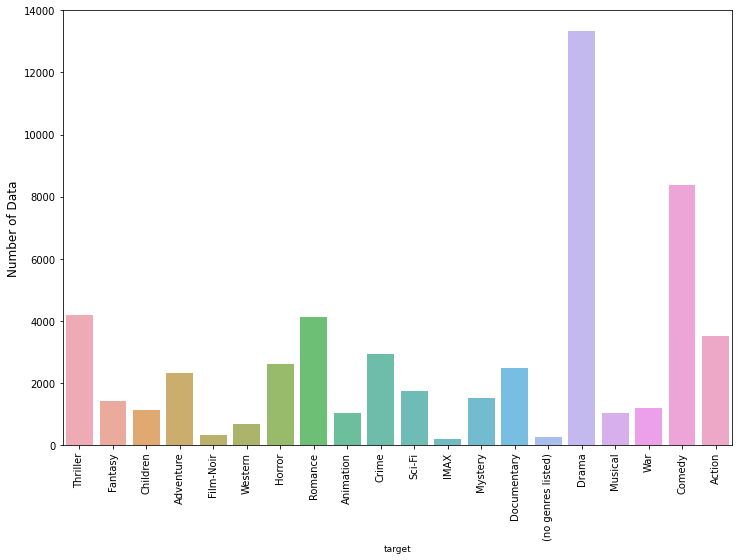

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(genres_values, count_values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show()

In [ ]:
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year 
movies.title = movies.title.str[:-7]
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movies = movies.join(movies.genres.str.get_dummies().astype(bool))
movies.drop('genres', inplace=True, axis=1)
movies.dropna(inplace=True)
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)

<Figure size 720x360 with 0 Axes>

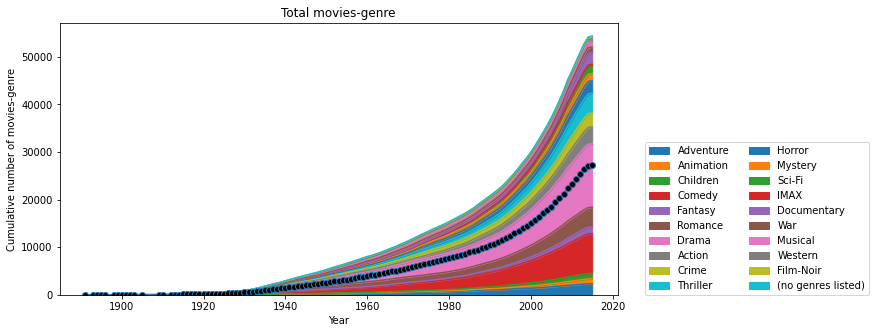

In [ ]:
plt.figure(figsize=(10,5))
dftmp = movies[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})
for genre in genres_unique.genre:
    dftmp = movies[movies[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()
df.fillna(method='ffill', inplace=True)
df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5))
plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()

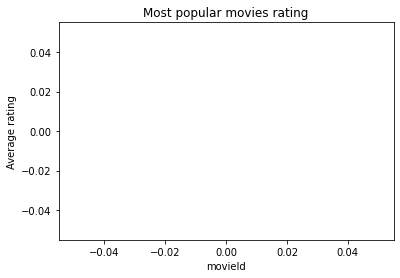

In [ ]:
dftmp = rating[['userId', 'movieId']].groupby('movieId').count()
dftmp.columns=['num_ratings']
rating.set_index('movieId').loc[dftmp.index[dftmp.num_ratings>40000]].groupby('movieId').mean().rating.plot(style='o')
plt.ylabel('Average rating')
plt.title('Most popular movies rating')
plt.show()

In [ ]:
ratings = pd.read_csv('/content/rating.csv', parse_dates=['timestamp'])
ratings 

,userId,movieId,rating,timestamp
0,1,2.0,3.5,2005-04-02 23:53:47
1,1,29.0,3.5,2005-04-02 23:31:16
2,1,32.0,3.5,2005-04-02 23:33:39
3,1,47.0,3.5,2005-04-02 23:32:07
4,1,50.0,3.5,2005-04-02 23:29:40
...,...,...,...,...
1606617,10829,2335.0,4.0,2008-12-28 06:51:58
1606618,10829,2355.0,4.0,2008-12-28 05:37:05
1606619,10829,2359.0,5.0,2008-12-28 04:18:19
1606620,10829,2366.0,4.0,2008-12-28 06:39:20


In [ ]:
rand_userIds = np.random.choice(ratings['userId'].unique(),
                               size=int(len(ratings['userId'].unique())*0.1),
                               replace=False)

ratings = ratings.loc[ratings['userId'].isin(rand_userIds)]

print('There are {} rows of data from {} users'.format(len(ratings),len(rand_userIds)))

There are 166071 rows of data from 1082 users


In [ ]:
ratings['rank_latest'] = ratings.groupby(['userId'])['timestamp'].rank(method='first', ascending=False)

train_ratings = ratings[ratings['rank_latest'] != 1]
test_ratings = ratings[ratings['rank_latest'] == 1]

# ihtiyacımız olamyan sütunları atıyoruz
train_ratings = train_ratings[['userId', 'movieId', 'rating']]
test_ratings = test_ratings[['userId', 'movieId', 'rating']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_ratings

,userId,movieId,rating
423,4,6.0,3.0
424,4,10.0,4.0
425,4,19.0,3.0
426,4,32.0,1.0
427,4,165.0,3.0
...,...,...,...
1603490,10809,79132.0,4.5
1603491,10809,79695.0,3.5
1603492,10809,80463.0,4.5
1603493,10809,80693.0,4.0


In [ ]:
train_ratings.loc[:, 'rating'] = 1
train_ratings.sample(10)

,userId,movieId,rating
490670,3295,7215.0,1
696662,4615,886.0,1
1130247,7713,367.0,1
1094029,7459,3089.0,1
1079066,7348,2059.0,1
109794,749,454.0,1
659562,4385,485.0,1
1473512,9967,2268.0,1
1430537,9664,135.0,1
312300,2136,3980.0,1


In [ ]:
train_ratings.loc[:, 'rating'] = 2
train_ratings.sample(10)

,userId,movieId,rating
14659,124,185.0,2
1498625,10149,3793.0,2
402673,2743,2355.0,2
1342447,9116,671.0,2
192307,1310,1438.0,2
555248,3730,3510.0,2
1450014,9801,1676.0,2
573426,3858,3618.0,2
728585,4855,81591.0,2
1474980,9983,260.0,2


In [ ]:
all_movieIds = ratings['movieId'].unique()

# eğitim verilerini tutacağımız değişkenler
users, items, labels = [], [], []

# her kullanıcının etkileşimde bulunduğu filmler kümesi
user_item_set = set(zip(train_ratings['userId'], train_ratings['movieId']))

# 4:1 pozitif ve negatif örnek oranı
num_negatives = 4

for (u, i) in tqdm(user_item_set):
    users.append(u)
    items.append(i)
    labels.append(1) # kullanıcıların etkileşimde bulunduğu filmler pozitiftir.
    for _ in range(num_negatives):
        # rastgele örnek seçilmesi
        negative_item = np.random.choice(all_movieIds) 
        # kullanıcının bu film ile etkileşime girmediğini kontrol edin
        while (u, negative_item) in user_item_set:
            negative_item = np.random.choice(all_movieIds)
        users.append(u)
        items.append(negative_item)
        labels.append(0) 

100%|██████████| 164989/164989 [00:03<00:00, 45174.37it/s]


In [ ]:
class MovieLensTrainDataset(Dataset):
    def __init__(self, ratings, all_movieIds):
        self.users, self.items, self.labels = self.get_dataset(ratings, all_movieIds)

    def __len__(self):
        return len(self.users)
  
    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]

    def get_dataset(self, ratings, all_movieIds):
        users, items, labels = [], [], []
        user_item_set = set(zip(ratings['userId'], ratings['movieId']))

        num_negatives = 4
        for u, i in user_item_set:
            users.append(u)
            items.append(i)
            labels.append(1)
            for _ in range(num_negatives):
                negative_item = np.random.choice(all_movieIds)
                while (u, negative_item) in user_item_set:
                    negative_item = np.random.choice(all_movieIds)
                users.append(u)
                items.append(negative_item)
                labels.append(0)

        return torch.tensor(users), torch.tensor(items), torch.tensor(labels)

In [ ]:
class NCF(pl.LightningModule):
    
    def __init__(self, num_users, num_items, ratings, all_movieIds):
        super().__init__()
        self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=8)
        self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=8)
        self.fc1 = nn.Linear(in_features=16, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.output = nn.Linear(in_features=32, out_features=1)
        self.ratings = ratings
        self.all_movieIds = all_movieIds
        
    def forward(self, user_input, item_input):
      
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)
        vector = torch.cat([user_embedded, item_embedded], dim=-1)
        vector = nn.ReLU()(self.fc1(vector))
        vector = nn.ReLU()(self.fc2(vector))
        pred = nn.Sigmoid()(self.output(vector))

        return pred
    def training_step(self, batch, batch_idx):
        user_input, item_input, labels = batch
        predicted_labels = self(user_input, item_input)
        loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def train_dataloader(self):
        return DataLoader(MovieLensTrainDataset(self.ratings, self.all_movieIds),
                          batch_size=512, num_workers=4)

In [ ]:
train_ratings

,userId,movieId,rating
423,4,6.0,2
424,4,10.0,2
425,4,19.0,2
426,4,32.0,2
427,4,165.0,2
...,...,...,...
1603490,10809,79132.0,2
1603491,10809,79695.0,2
1603492,10809,80463.0,2
1603493,10809,80693.0,2


In [ ]:
num_users = ratings['userId'].max()+1
num_items = ratings['movieId'].max()+1
all_movieIds = ratings['movieId'].unique()


In [ ]:
#model = NCF(num_users, num_items, train_ratings, all_movieIds)

##ItemBasedCollaborative Filtering

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv("/content/movie.csv")
ratings = pd.read_csv("/content/rating.csv")


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
df=final_dataset
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,10790,10791,10792,10793,10794,10795,10796,10797,10798,10799,10800,10801,10802,10803,10804,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814,10815,10816,10817,10818,10819,10820,10821,10822,10823,10824,10825,10826,10827,10828,10829
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,4.5,4.0,4.0,4.5,NaN,3.0,NaN,NaN,5.0,NaN,NaN,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,...,3.0,NaN,NaN,NaN,4.5,5.0,5.0,5.0,NaN,3.5,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,3.5,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,4.5,NaN,3.0,NaN,NaN,4.5,NaN,3.5
2.0,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,2.5,NaN,NaN,NaN,NaN,3.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.5,3.0,NaN,2.5,NaN,NaN,NaN,NaN,4.5
3.0,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,10790,10791,10792,10793,10794,10795,10796,10797,10798,10799,10800,10801,10802,10803,10804,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814,10815,10816,10817,10818,10819,10820,10821,10822,10823,10824,10825,10826,10827,10828,10829
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,4.5,4.0,4.0,4.5,0.0,3.0,0.0,0.0,5.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,3.0,0.0,0.0,0.0,4.5,5.0,5.0,5.0,0.0,3.5,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,3.5,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.5,0.0,3.0,0.0,0.0,4.5,0.0,3.5
2.0,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,2.5,0.0,0.0,0.0,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.5,3.0,0.0,2.5,0.0,0.0,0.0,0.0,4.5
3.0,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [ ]:
no_user_voted 

movieId
1.0         3902
2.0         1753
3.0         1022
4.0          222
5.0          987
            ... 
130490.0       2
130496.0       1
130512.0       1
130642.0       1
130768.0       1
Name: rating, Length: 15983, dtype: int64

In [ ]:
no_movies_voted

userId
1        175
2         61
3        187
4         28
5         66
        ... 
10825     33
10826     81
10827    159
10828     22
10829    319
Name: rating, Length: 10829, dtype: int64

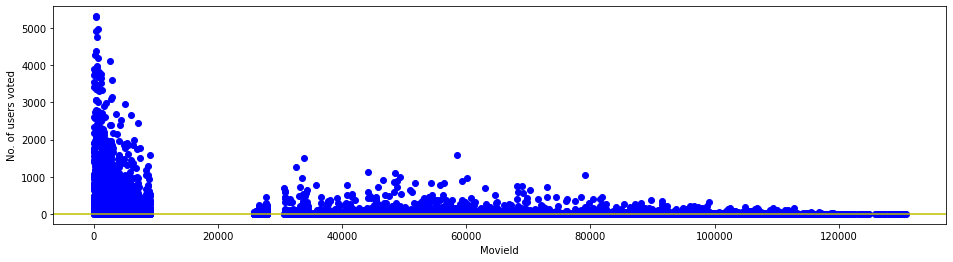

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='blue')
plt.axhline(y=10,color='y')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,10790,10791,10792,10793,10794,10795,10796,10797,10798,10799,10800,10801,10802,10803,10804,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814,10815,10816,10817,10818,10819,10820,10821,10822,10823,10824,10825,10826,10827,10828,10829
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,4.5,4.0,4.0,4.5,0.0,3.0,0.0,0.0,5.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,3.0,0.0,0.0,0.0,4.5,5.0,5.0,5.0,0.0,3.5,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,3.5,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.5,0.0,3.0,0.0,0.0,4.5,0.0,3.5
2.0,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,2.5,0.0,0.0,0.0,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.5,3.0,0.0,2.5,0.0,0.0,0.0,0.0,4.5
3.0,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0
117176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


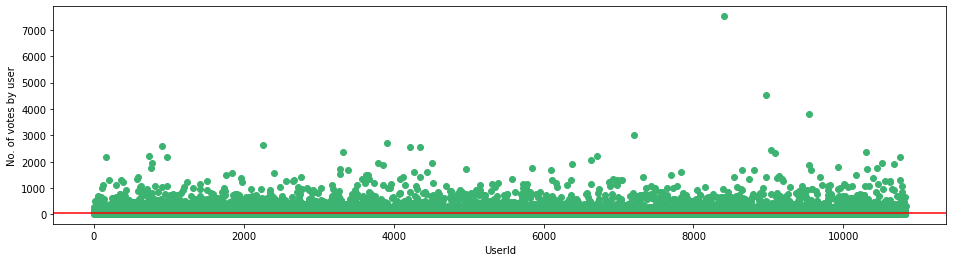

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,2,3,5,7,8,11,13,14,16,18,21,22,23,24,25,26,27,29,31,32,34,35,38,40,41,42,43,46,48,50,51,53,54,56,58,60,61,65,66,...,10764,10765,10771,10772,10773,10774,10775,10778,10781,10783,10784,10786,10788,10789,10790,10796,10797,10799,10801,10802,10803,10804,10805,10807,10808,10809,10810,10812,10813,10815,10817,10818,10819,10821,10822,10823,10824,10826,10827,10829
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,0.0,0.0,0.0,4.0,...,4.5,4.0,0.0,4.0,0.0,4.5,4.0,3.0,2.0,0.0,0.0,3.0,3.0,5.0,3.0,5.0,5.0,3.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,3.5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.5,0.0,3.0,0.0,4.5,3.5
2.0,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,2.5,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.0,0.0,2.5,0.0,0.0,4.5
3.0,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117176.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=15, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                 radius=1.0)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation('Speed')

,Title,Distance
1,Apollo 13 (1995),0.355355
2,Ghost (1990),0.354426
3,Batman (1989),0.353836
4,Pretty Woman (1990),0.351216
5,Die Hard: With a Vengeance (1995),0.342334
6,Forrest Gump (1994),0.328995
7,Terminator 2: Judgment Day (1991),0.316481
8,True Lies (1994),0.293500
9,"Fugitive, The (1993)",0.289392
10,Jurassic Park (1993),0.279961


##Mise en œuvre du système de recommandation avec Deep Learning et PyTorch

In [ ]:
import io
import os
import math
import copy
import pickle
import zipfile
from textwrap import wrap
from pathlib import Path
from itertools import zip_longest
from collections import defaultdict
from urllib.error import URLError
from urllib.request import urlopen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch import optim
from torch.nn import functional as F 
from torch.optim.lr_scheduler import _LRScheduler

In [ ]:
plt.style.use('ggplot')

In [ ]:
def set_random_seed(state=1):
    gens = (np.random.seed, torch.manual_seed, torch.cuda.manual_seed)
    for set_state in gens:
        set_state(state)

In [ ]:
RANDOM_STATE = 1
set_random_seed(RANDOM_STATE)

##systemes de recommendation de livre

In [1]:
pip install  plotly

In [7]:
import plotly.graph_objs as go
from plotly.offline import  init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import pandas as pd

cf.set_config_file(offline=False, world_readable=True)
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
import re
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [14]:
books_data = pd.read_csv('/content/sample_data/books.csv')
tags_data = pd.read_csv('/content/sample_data/tags.csv')
ratings_data = pd.read_csv('/content/sample_data/to_read.csv')
book_tags = pd.read_csv('/content/sample_data/book_tags.csv')

In [15]:
books_data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [16]:
books_data = books_data.drop(columns=['id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'image_url','small_image_url'])

In [17]:
books_data

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664
...,...,...,...,...,...,...,...,...
9995,7130616,19,Ilona Andrews,2010.0,Bayou Moon,eng,4.09,17204
9996,208324,19,Robert A. Caro,1990.0,Means of Ascent,eng,4.25,12582
9997,77431,60,Patrick O'Brian,1977.0,The Mauritius Command,eng,4.35,9421
9998,8565083,7,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279


## Content based systemes  de  recomendnation

In [18]:
content_data = books_data[['original_title','authors','average_rating']]
content_data = content_data.astype(str)

In [19]:
content_data['content'] = content_data['original_title'] + ' ' + content_data['authors'] + ' ' + content_data['average_rating']

In [26]:
ratings_data = ratings_data.sort_values("user_id")
ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 
ratings_data

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874
...,...,...
715445,42027,1529
715444,42027,1315
715447,42027,1855
715454,42027,2572


In [37]:
books

,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count
0,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653
1,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479
2,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839
3,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671
4,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664
...,...,...,...,...,...,...,...
9995,19,Ilona Andrews,2010.0,Bayou Moon,eng,4.09,17204
9996,19,Robert A. Caro,1990.0,Means of Ascent,eng,4.25,12582
9997,60,Patrick O'Brian,1977.0,The Mauritius Command,eng,4.35,9421
9998,7,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279


In [41]:
!pip  install plotly_express 

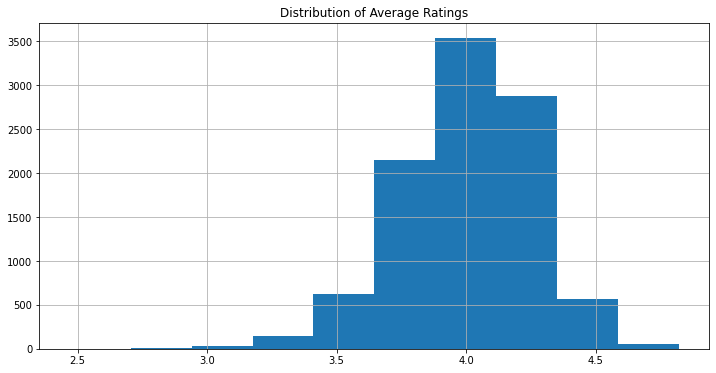

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import plotly_express  as px
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
plt.title("Distribution of Average Ratings")
books["average_rating"].hist()
display()

In [44]:
fig = px.bar(top_author_counts.tail(10), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig.show()

KeyError: ignored

In [46]:
books_filter = pd.DataFrame(books, columns=['book_id', 'authors', 'original_title', 'average_rating'])
books_filter = books_filter.sort_values('average_rating', ascending=False)
books_filter.head(15)

,book_id,authors,original_title,average_rating
3627,NaN,Bill Watterson,The Complete Calvin and Hobbes,4.82
3274,NaN,"J.K. Rowling, Mary GrandPré",NaN,4.77
861,NaN,Brandon Sanderson,Words of Radiance,4.77
8853,NaN,Francine Rivers,Mark of the Lion Trilogy,4.76
7946,NaN,"Anonymous, Lane T. Dennis, Wayne A. Grudem",NaN,4.76
4482,NaN,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,4.75
6360,NaN,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,4.74
421,NaN,J.K. Rowling,Complete Harry Potter Boxed Set,4.74
3752,NaN,J.K. Rowling,"Harry Potter Collection (Harry Potter, #1-6)",4.73
6919,NaN,Bill Watterson,The Indispensable Calvin and Hobbes: A Calvin ...,4.73


In [68]:
ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 
books.drop_duplicates(subset='original_title',keep=False,inplace=True)

In [70]:
merge_data2 = pd.merge(books2, ratings_data, on='book_id')
merge_data2 =  merge_data2.sort_values('book_id', ascending=True)
merge_data2.head()

NameError: ignored

In [72]:
ratings=pd.read_csv('/content/sample_data/ratings.csv')
books=pd.read_csv('/content/sample_data/books.csv')
print(ratings.head())
books['elo']=1200.0
print(books.head())

   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4
   id  book_id  ...                                    small_image_url     elo
0   1  2767052  ...  https://images.gr-assets.com/books/1447303603s...  1200.0
1   2        3  ...  https://images.gr-assets.com/books/1474154022s...  1200.0
2   3    41865  ...  https://images.gr-assets.com/books/1361039443s...  1200.0
3   4     2657  ...  https://images.gr-assets.com/books/1361975680s...  1200.0
4   5     4671  ...  https://images.gr-assets.com/books/1490528560s...  1200.0

[5 rows x 24 columns]


In [ ]:
from scipy.sparse import coo_matrix, csr_matrix
import  pandas as pd
def read_data(filename):
    """ Reads in the last.fm dataset, and returns a tuple of a pandas dataframe
    and a sparse matrix of song/user/playcount """
    # read in triples of user/song/playcount from the input dataset
    data = pd.read_csv(filename,
                             usecols=[0,1,2],        #[36, 11, 10] vrk_pat_primkey,prd_atc_primkey,vdp_aantal
                             names=['song', 'user','plays'],skiprows=1) #[:1000000]   # user = patient, or prescriptionnr song=atc

    data=data.dropna(axis=0, how='any')  #drop nan
    data['plays']=data['plays']+1
    print(data.head())
    # map each song and user to a unique numeric value
    data['user'] = data['user'].astype("category")
    data['song'] = data['song'].astype("category")

    # create a sparse matrix of all the users/plays
    plays = coo_matrix((data['plays'].astype(float),
                       (data['song'].cat.codes.copy(),
                        data['user'].cat.codes.copy())))
    data['song_nr']=data['song'].cat.codes.copy()
    return data, plays,data.groupby(['song_nr','song']).plays.sum(),data['user'].cat.codes.copy()

data,matrix,songsd,user=read_data('/content/sample_data/ratings.csv')
data.head()

   song  user  plays
0     1   314      6
1     1   439      4
2     1   588      6
3     1  1169      5
4     1  1185      5
